# K-Nearest Neighbors from Scratch

In this notebook, you will implement your own version of $k$-nearest neighbors. Of course, $k$-nearest neighbors is implemented in Scikit-Learn, so there is no real reason to build it ourselves.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("/data/harris.csv")

**Exercise 1.** Write one-off code to predict the starting salary of an employee with 8 years (96 months) of experience and 15 years of education, based on the 4-nearest neighbors according to Euclidean distance.

In [36]:
def euclidean_distance(x1, x2):
    return np.sqrt(sum((x1 - x2) ** 2))

In [25]:
X_train = data[["Exper", "Educ"]]
y_train = data["Bsal"]

x_test = pd.Series({
        "Exper": 96,
        "Educ": 15
    })

# YOUR CODE HERE
dists = np.sqrt(((X_train - x_test)**2).sum(axis=1))
y_train.loc[dists.nsmallest().index[:4]].mean()

5400.0

**Exercise 2.** Write a general function, `k_nearest_neighbors`, that takes in `X_train`, `y_train`, $k$, and a distance function, and predicts the response for a new input value `x_test`.

In [41]:
euclidean_distance(X_train.values, x_test.values)

array([ 1203.1758236 ,   805.49053377])

In [42]:
def k_nearest_neighbors(x_test, X_train, y_train, k, dist=euclidean_distance):
    """Predict output value for x_test based on the k-nearest training observations.
    
    Args:
      - x_test: the input for which we want to predict the output
      - X_train: a DataFrame of training inputs
      - y_train: a Series of training outputs
      - k: how many nearest neighbors to use
      - dist: a function that returns the distance between the two vectors
      
    Returns:
      the predicted output value for x_test, obtained by averaging y_train for the
      k observations in X_train that are closest to x_test
    """
    # YOUR CODE HERE
    def dist_from_x_test(x):
        return dist(x, x_test)
    
    dists = X_train.apply(dist_from_x_test, axis=1)
    return y_train[dists.nsmallest().index[:k]].mean()

The code below tests the function that you wrote. The code should plot the estimated curve when you fit a k-nearest neighbors model to predict `Bsal` from `Exper`. 

Try modifying $k$. What happens to the curve as $k$ increases?

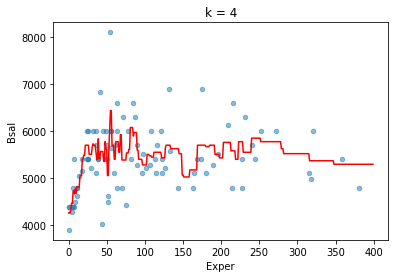

In [43]:
# Plot the k-nearest neighbors model for predicting Bsal from Exper.
k = 4
x_new = range(0, 400)
y_pred = [k_nearest_neighbors(np.array(x), data[["Exper"]], data["Bsal"], k) for x in x_new]

data.plot.scatter(x="Exper", y="Bsal", alpha=.5)
plt.plot(x_new, y_pred, 'r')
plt.title("k = %d" % k)

Notice how slow our function is. This is because we re-sort the data for each value we want to predict.

A better implementation would sort the data once and store the sorted data in a specialized data structure that makes it fast to find the nearest neighbors for any test input. However, implementing such a routine is beyond the scope of this class. Instead, we will use Scikit-Learn's implementation of $k$-nearest neighbors, which does all of these optimizations under the hood.